In [1]:
import pandas as pd
import ast
from pathlib import Path
from orderbook_data_tools import load_snapshot_dataframe

In [3]:
snapshot = pd.read_csv('./data/BTCUSDT_depth_snapshot_1000_20251030_130733.csv')

In [5]:
snapshot.head(2)

,ts_utc,symbol,last_update_id,bids,asks,ts_dt
0,2025-10-30T13:07:33.477928+00:00,BTCUSDT,79338756060,"[(108590.38, 1.31841), (108590.37, 0.0005), (1...","[(108590.39, 3.11322), (108590.47, 0.0001), (1...",2025-10-30 13:07:33.477928+00:00
1,2025-10-30T13:07:34.558269+00:00,BTCUSDT,79338757182,"[(108590.38, 2.49619), (108590.37, 5e-05), (10...","[(108590.39, 1.42561), (108590.47, 0.00207), (...",2025-10-30 13:07:34.558269+00:00


In [8]:
snapshot.bids[0]

'[(108590.38, 1.31841), (108590.37, 0.0005), (108590.31, 0.0001), (108590.2, 0.0001), (108590.19, 0.03221), (108589.96, 5e-05), (108589.04, 0.01797), (108589.02, 5e-05), (108588.96, 5e-05), (108588.75, 5e-05), (108588.24, 5e-05), (108588.12, 0.0001), (108588.11, 0.04546), (108587.99, 0.0001), (108587.98, 0.67927), (108587.97, 0.00205), (108587.78, 0.00018), (108587.52, 6e-05), (108586.8, 0.00011), (108586.44, 0.00092), (108586.43, 0.0026), (108586.4, 0.0001), (108586.31, 0.0001), (108586.3, 0.0001), (108585.91, 0.01333), (108585.85, 5e-05), (108585.55, 0.0358), (108585.34, 5e-05), (108585.0, 0.0003), (108584.95, 0.00148), (108584.7, 0.00255), (108584.44, 5e-05), (108584.24, 5e-05), (108584.23, 0.0001), (108584.18, 0.0001), (108583.1, 0.0001), (108583.09, 0.0001), (108583.0, 5e-05), (108582.49, 0.25), (108582.2, 5e-05), (108581.24, 5e-05), (108581.06, 0.01842), (108580.93, 0.0001), (108580.91, 5e-05), (108580.64, 5e-05), (108580.35, 0.00255), (108580.17, 2.02489), (108580.03, 5e-05), (1

In [11]:
bids = ast.literal_eval(snapshot.bids[0])

In [23]:
bid_df = pd.DataFrame([[price, quant] for (price, quant) in bids])

<Axes: >

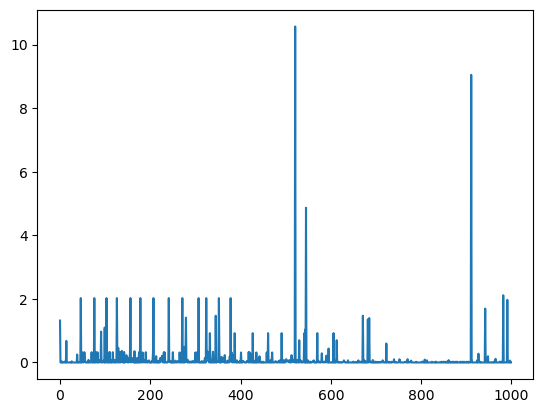

In [28]:
bid_df[1].plot()

<Axes: >

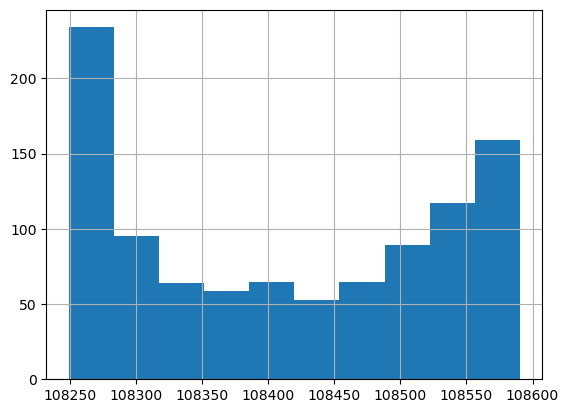

In [29]:
bid_df[0].hist()

In [3]:
df = pd.read_csv('./data/BTCUSDT_book_top100_20251031_005923.csv.gz')

In [7]:
df.bid1_px-df.bid2_px

0       0.01
1       0.01
2       0.01
3       0.01
4       0.01
        ... 
5268    0.01
5269    0.01
5270    0.01
5271    0.01
5272    0.01
Length: 5273, dtype: float64